In [1]:
# https://medium.com/@esrasoylu/creating-a-cnn-model-for-image-classification-with-tensorflow-49b84be8c12a

import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from keras.layers import Input
import matplotlib.pyplot as plt

# Enable Nvidia GPUs by un-commenting this line 
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
XLA_FLAGS="--xla_gpu_cuda_data_dir=/usr/"

# To get reproducable results with the same training setting random seed
SEED = 42
np.random.seed(SEED)

2025-01-11 13:11:28.817498: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-11 13:11:28.879069: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-11 13:11:29.520991: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(xtrain,ytrain),(xtest,ytest)=datasets.cifar10.load_data()

In [3]:
ytest=ytest.reshape(-1,)
ytest

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [4]:
classname=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [5]:
def example(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index]) 
    plt.xlabel(classname[y[index]])

#x: Dataset containing the images.
#y: Dataset containing the labels. Specifies the class of each image.
#index: Specify the index of the data point to be visualized

Dims (10000, 32, 32, 3)


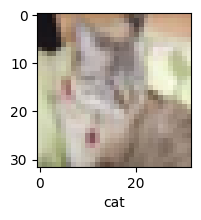

In [6]:
example(xtest,ytest,8)
print("Dims", xtest.shape)

In [7]:
xtrain=xtrain/255
xtest=xtest/255

In [8]:
model = models.Sequential([
    Input(shape=(32,32,3)),  # InputLayer'ı buraya ekleyin
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

2025-01-11 13:11:32.162354: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-01-11 13:11:32.162372: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:134] retrieving CUDA diagnostic information for host: fos-deeplearning
2025-01-11 13:11:32.162375: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:141] hostname: fos-deeplearning
2025-01-11 13:11:32.162440: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:165] libcuda reported version is: 550.127.8
2025-01-11 13:11:32.162452: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:169] kernel reported version is: 550.127.8
2025-01-11 13:11:32.162454: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:248] kernel version seems to match DSO: 550.127.8


In [9]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [10]:
history=model.fit(xtrain,ytrain,epochs=30, validation_data=(xtest,ytest))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3816 - loss: 1.7112 - val_accuracy: 0.5701 - val_loss: 1.2230
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5936 - loss: 1.1523 - val_accuracy: 0.6366 - val_loss: 1.0464
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6486 - loss: 1.0045 - val_accuracy: 0.6496 - val_loss: 1.0152
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6817 - loss: 0.9145 - val_accuracy: 0.6590 - val_loss: 0.9898
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7115 - loss: 0.8402 - val_accuracy: 0.6819 - val_loss: 0.9305
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7284 - loss: 0.7855 - val_accuracy: 0.6939 - val_loss: 0.9151
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7467 - loss: 0.7278 - val_accuracy: 0.6891 - val_loss: 0.9156
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7552 - loss: 0.7026 - 

In [11]:
loss,acc= model.evaluate(xtest,ytest,verbose=False)

Text(0.5, 1.0, 'Training and Test Performance Graph')

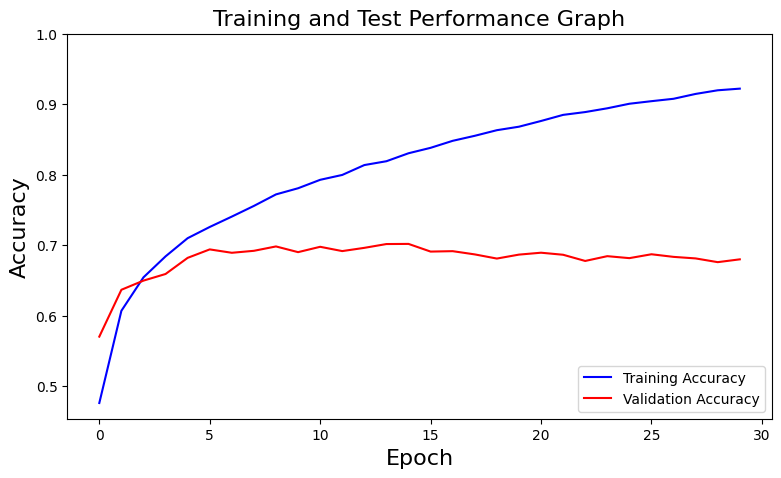

In [12]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],color = "b",label= "Training Accuracy")
plt.plot(history.history["val_accuracy"], color = "r", label = "Validation Accuracy")
plt.legend(loc = "lower right")
plt.xlabel("Epoch", fontsize= 16)
plt.ylabel("Accuracy",fontsize = 16)
plt.ylim([min(plt.ylim()),1])
plt.title("Training and Test Performance Graph", fontsize = 16)

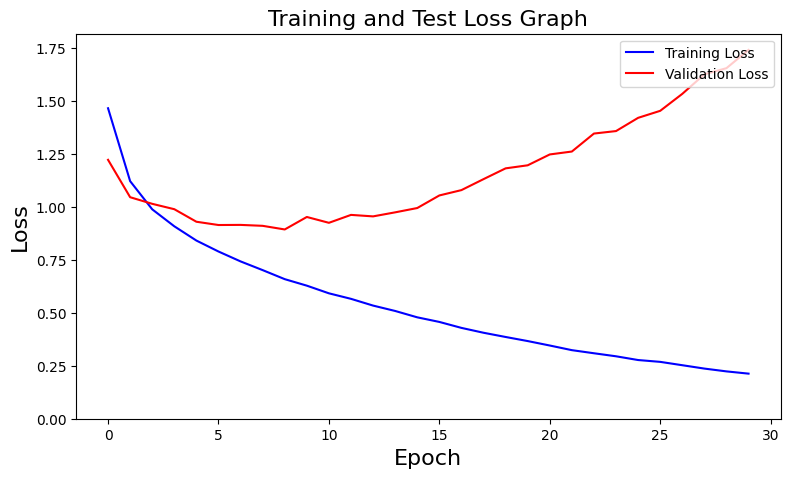

In [13]:
plt.figure(figsize= (20,5))
plt.subplot(1,2,2)
plt.plot(history.history["loss"],color= "b",label="Training Loss")
plt.plot(history.history["val_loss"],color="r",label="Validation Loss")
plt.legend(loc= "upper right")
plt.xlabel("Epoch",fontsize=16)
plt.ylabel("Loss",fontsize = 16)
plt.ylim([0,max(plt.ylim())])
plt.title("Training and Test Loss Graph",fontsize= 16)
plt.show()

In [14]:
ypred=model.predict(xtest)
ypred[:3]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[2.6854136e-10, 1.4416739e-13, 1.7461338e-07, 9.9989426e-01,
        9.9174099e-07, 1.0447836e-04, 1.0207082e-09, 8.2640457e-12,
        2.1396350e-10, 1.4088504e-16],
       [1.4793870e-10, 1.3030241e-03, 7.3577782e-17, 3.7830133e-16,
        1.8171725e-18, 7.0738501e-18, 4.3643595e-19, 2.2779962e-23,
        9.9869698e-01, 5.2492304e-08],
       [1.5384537e-03, 8.2030958e-01, 1.5373375e-07, 2.7503363e-08,
        5.9223061e-07, 3.2229583e-09, 4.4926880e-09, 1.1682735e-06,
        1.6648601e-01, 1.1664053e-02]], dtype=float32)

In [15]:
ypred1=[np.argmax(element) for element in ypred]
ypred1[:3]

[3, 8, 1]

In [16]:
# True classes
y_true = [3, 8, 8, 0]

# Predicted classes
ypred1 = [3, 8, 1, 0]

# Printing the true and predicted classes
for true, pred in zip(y_true[:3], ypred1[:3]):
    print("True Class:", classname[true], "\tPredicted Class:", classname[pred])

True Class: cat 	Predicted Class: cat
True Class: ship 	Predicted Class: ship
True Class: ship 	Predicted Class: automobile
